In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from pathlib import Path as Path

In [4]:
edx_course_descriptions = pd.read_csv(r"C:\Users\rahul\OneDrive\Desktop\Projects\Edx Courses\edx_courses.csv")
edx_course_descriptions.tail(3)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
972,Computational Neuroscience: Neuronal Dynamics ...,This course explains the mathematical and comp...,"11,246",Self-paced on your time,École polytechnique fédérale de Lausanne,Wulfram Gerstner,Advanced,Biology & Life Sciences,English,English,4–6 hours per week,6 Weeks,FREE-Add a Verified Certificate for $139 USD,What happens in your brain when you make a dec...,Textbook: Neuronal Dynamics - from single neur...,https://www.edx.org/course/computational-neuro...
973,Cities and the Challenge of Sustainable Develo...,What is a sustainable city? Learn the basics h...,"8,775",Self-paced on your time,SDG Academy,Jeffrey D. Sachs,Introductory,Environmental Studies,English,English,1–2 hours per week,1 Weeks,FREE-Add a Verified Certificate for $25 USD,"According to the United Nations, urbanization ...",Module 1: Introduction to the SDGsProfessor Je...,https://www.edx.org/course/cities-and-the-chal...
974,MathTrackX: Special Functions,"Understand trigonometric, exponential and loga...",NaN,Self-paced on your time,University of Adelaide,Dr David Butler,Introductory,Math,English,English,3–6 hours per week,4 Weeks,FREE-Add a Verified Certificate for $79 USD,This course is part two of the MathTrackX XSer...,NaN,https://www.edx.org/course/mathtrackx-special-...


In [4]:
edx_user_data = pd.read_csv('EDX_1_2016.csv')
edx_user_data.head(3)

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),...,% Certified of > 50% Course Content Accessed,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
0,MITx,6.002x,9/5/12,Circuits and Electronics,Khurram Afridi,"Science, Technology, Engineering, and Mathematics",1,1,36105,5431,...,54.98,83.2,8.17,28.97,418.94,64.45,26.0,88.28,11.72,60.68
1,MITx,6.00x,9/26/12,Introduction to Computer Science and Programming,"Eric Grimson, John Guttag, Chris Terman",Computer Science,1,1,62709,8949,...,64.05,89.14,14.38,39.50,884.04,78.53,28.0,83.50,16.50,63.04
2,MITx,3.091x,10/9/12,Introduction to Solid State Chemistry,Michael Cima,"Science, Technology, Engineering, and Mathematics",1,1,16663,2855,...,72.85,87.49,14.42,34.89,227.55,61.28,27.0,70.32,29.68,58.76


In [5]:
edx_course_descriptions.dtypes

title                 object
summary               object
n_enrolled            object
course_type           object
institution           object
instructors           object
Level                 object
subject               object
language              object
subtitles             object
course_effort         object
course_length         object
price                 object
course_description    object
course_syllabus       object
course_url            object
dtype: object

In [7]:
edx_course_descriptions['n_enrolled'] = edx_course_descriptions['n_enrolled'].fillna(0)

In [8]:
edx_course_descriptions['n_enrolled'] = edx_course_descriptions['n_enrolled'].astype(int)

In [9]:
edx_course_descriptions['price'] = edx_course_descriptions['price'].astype(float)

In [10]:
edx_course_descriptions['course_length'] = edx_course_descriptions['course_length'].astype(int)

In [11]:
edx_course_descriptions.isna().sum()

title                   0
summary                53
n_enrolled              0
course_type             0
institution             0
instructors             3
Level                   0
subject                 0
language                0
subtitles               3
course_effort           0
course_length           0
price                   0
course_description     40
course_syllabus       558
course_url              0
dtype: int64

In [12]:
edx_course_descriptions['summary'] = edx_course_descriptions['summary'].fillna('Unlisted')

In [13]:
edx_course_descriptions['instructors'] = edx_course_descriptions['instructors'].fillna('Unlisted')

In [14]:
edx_course_descriptions['subtitles'] = edx_course_descriptions['subtitles'].fillna('English')

In [15]:
edx_course_descriptions['course_description'] = edx_course_descriptions['course_description'].fillna('Unlisted')

In [16]:
edx_course_descriptions['course_syllabus'] = edx_course_descriptions['course_syllabus'].fillna('Unlisted')

In [17]:
edx_course_descriptions.tail(3)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
972,Computational Neuroscience: Neuronal Dynamics ...,This course explains the mathematical and comp...,11246,Self-paced on your time,École polytechnique fédérale de Lausanne,Wulfram Gerstner,Advanced,Biology & Life Sciences,English,English,4–6 hours per week,6,139.0,What happens in your brain when you make a dec...,Textbook: Neuronal Dynamics - from single neur...,https://www.edx.org/course/computational-neuro...
973,Cities and the Challenge of Sustainable Develo...,What is a sustainable city? Learn the basics h...,8775,Self-paced on your time,SDG Academy,Jeffrey D. Sachs,Introductory,Environmental Studies,English,English,1–2 hours per week,1,25.0,"According to the United Nations, urbanization ...",Module 1: Introduction to the SDGsProfessor Je...,https://www.edx.org/course/cities-and-the-chal...
974,MathTrackX: Special Functions,"Understand trigonometric, exponential and loga...",0,Self-paced on your time,University of Adelaide,Dr David Butler,Introductory,Math,English,English,3–6 hours per week,4,79.0,This course is part two of the MathTrackX XSer...,Unlisted,https://www.edx.org/course/mathtrackx-special-...


In [18]:
del edx_course_descriptions['course_url']

In [19]:
edx_course_descriptions.tail(3)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus
972,Computational Neuroscience: Neuronal Dynamics ...,This course explains the mathematical and comp...,11246,Self-paced on your time,École polytechnique fédérale de Lausanne,Wulfram Gerstner,Advanced,Biology & Life Sciences,English,English,4–6 hours per week,6,139.0,What happens in your brain when you make a dec...,Textbook: Neuronal Dynamics - from single neur...
973,Cities and the Challenge of Sustainable Develo...,What is a sustainable city? Learn the basics h...,8775,Self-paced on your time,SDG Academy,Jeffrey D. Sachs,Introductory,Environmental Studies,English,English,1–2 hours per week,1,25.0,"According to the United Nations, urbanization ...",Module 1: Introduction to the SDGsProfessor Je...
974,MathTrackX: Special Functions,"Understand trigonometric, exponential and loga...",0,Self-paced on your time,University of Adelaide,Dr David Butler,Introductory,Math,English,English,3–6 hours per week,4,79.0,This course is part two of the MathTrackX XSer...,Unlisted


In [25]:
edx_course_descriptions['Level'] = edx_course_descriptions['Level'].astype('category')

In [26]:
edx_course_descriptions['Level'] = edx_course_descriptions['Level'].cat.codes

In [27]:
edx_course_descriptions['course_type'] = edx_course_descriptions['course_type'].astype('category')
edx_course_descriptions['course_type'] = edx_course_descriptions['course_type'].cat.codes

In [20]:
edx_course_descriptions.dtypes

title                  object
summary                object
n_enrolled              int32
course_type            object
institution            object
instructors            object
Level                  object
subject                object
language               object
subtitles              object
course_effort          object
course_length           int32
price                 float64
course_description     object
course_syllabus        object
dtype: object

In [23]:
edx_course_descriptions.head()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus
0,How to Learn Online,Learn essential strategies for successful onli...,124980,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2,49.0,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7,49.0,This course aims to teach everyone the basics ...,Unlisted
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,2442271,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12,90.0,"This is CS50x , Harvard University's introduct...",Unlisted
3,The Analytics Edge,"Through inspiring examples and stories, discov...",129555,Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13,199.0,"In the last decade, the amount of data availab...",Unlisted
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,81140,Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4,249.0,Begin your journey in a new career in marketin...,Unlisted


In [24]:
edx_course_descriptions['subject'].value_counts()

Computer Science                166
Business & Management           164
Data Analysis & Statistics       72
Humanities                       64
Engineering                      58
Social Sciences                  51
Economics & Finance              46
Communication                    39
Biology & Life Sciences          35
Language                         34
Math                             31
Medicine                         31
Education & Teacher Training     29
History                          20
Physics                          18
Environmental Studies            16
Art & Culture                    12
Health & Safety                  11
Law                              10
Science                          10
Design                            8
Energy & Earth Sciences           8
Electronics                       7
Music                             7
Food & Nutrition                  6
Philosophy & Ethics               6
Chemistry                         5
Architecture                

In [26]:
edx_course_description_csv = edx_course_descriptions.to_csv("edx_course_description_for_bq.csv")

In [27]:
Path('edx_course_descriptions.db').touch()
edx_conn = sqlite3.connect('edx_course_descriptions.db')
edx_cursor = edx_conn.cursor()

In [35]:
edx_course_descriptions.to_sql('edx_course_descriptions', edx_conn, if_exists='append', index=False)

975

In [29]:
edx_description_init_query = pd.read_sql(''' SELECT * FROM edx_course_descriptions ''', edx_conn)
edx_description_init_query

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus
0,How to Learn Online,Learn essential strategies for successful onli...,124980,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2,49.0,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7,49.0,This course aims to teach everyone the basics ...,Unlisted
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,2442271,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12,90.0,"This is CS50x , Harvard University's introduct...",Unlisted
3,The Analytics Edge,"Through inspiring examples and stories, discov...",129555,Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13,199.0,"In the last decade, the amount of data availab...",Unlisted
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,81140,Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4,249.0,Begin your journey in a new career in marketin...,Unlisted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,Leaders in Citizen Security and Justice Manage...,"Learn about the latest in prevention, police a...",0,Self-paced on your time,Inter-American Development Bank,Olga Espinoza-Eduardo Pazinato-Alejandra Mera-...,Intermediate,Social Sciences,English,English,4–5 hours per week,10,25.0,The high rates of crime and violence are two o...,Unlisted
971,Pattern Studying and Making | 图案审美与创作,Fantastic experiences in beauty and its repres...,0,Self-paced on your time,Tsinghua University,Yuehua Nie,Introductory,Art & Culture,中文,"English, 中文",3–5 hours per week,12,139.0,Are you an original designer? Or a DIY fancier...,Unlisted
972,Computational Neuroscience: Neuronal Dynamics ...,This course explains the mathematical and comp...,11246,Self-paced on your time,École polytechnique fédérale de Lausanne,Wulfram Gerstner,Advanced,Biology & Life Sciences,English,English,4–6 hours per week,6,139.0,What happens in your brain when you make a dec...,Textbook: Neuronal Dynamics - from single neur...
973,Cities and the Challenge of Sustainable Develo...,What is a sustainable city? Learn the basics h...,8775,Self-paced on your time,SDG Academy,Jeffrey D. Sachs,Introductory,Environmental Studies,English,English,1–2 hours per week,1,25.0,"According to the United Nations, urbanization ...",Module 1: Introduction to the SDGsProfessor Je...


In [36]:
data_analysis_query = pd.read_sql(''' SELECT title, price, course_effort, n_enrolled, institution 
                                      FROM edx_course_descriptions
                                      WHERE subject == 'Data Analysis & Statistics'
                                      ''', edx_conn)
data_analysis_query

,title,price,course_effort,n_enrolled,institution
0,The Analytics Edge,199.00,10–15 hours per week,129555,Massachusetts Institute of Technology
1,Data Science: R Basics,49.00,1–2 hours per week,528782,Harvard University
2,Python Basics for Data Science,39.00,2–5 hours per week,228809,IBM
3,Data Science: Machine Learning,49.00,2–4 hours per week,276209,Harvard University
4,Statistics and R,249.00,2–4 hours per week,314586,Harvard University
...,...,...,...,...,...
211,Introducción a Ciencias de Datos y Estadística...,49.99,5–8 hours per week,0,Tecnológico de Monterrey
212,PyTorch Basics for Machine Learning,39.00,4–5 hours per week,0,IBM
213,Análisis Multivariable en SPSS,49.00,4–5 hours per week,0,Universidad Galileo
214,Using GPUs to Scale and Speed-up Deep Learning,99.00,2–4 hours per week,9294,IBM


<AxesSubplot:xlabel='price', ylabel='n_enrolled'>

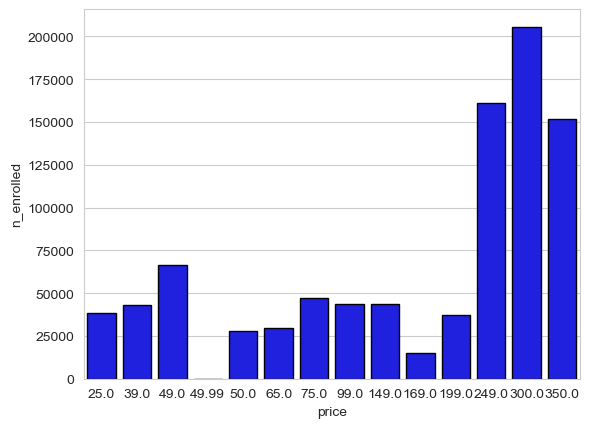

In [43]:
sns.barplot(x = 'price', y = 'n_enrolled', data = data_analysis_query, color = 'blue', edgecolor = 'black', ci=False)

In [45]:
data_analysis_query.mean()

C:\Users\rahul\AppData\Local\Temp\ipykernel_13108\2810120541.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_analysis_query.mean()


price            92.638750
n_enrolled    59227.944444
dtype: float64

In [46]:
data_analysis_python = pd.read_sql(''' SELECT title, price, course_effort, n_enrolled, institution
                                       FROM edx_course_descriptions
                                       WHERE title LIKE '%Python'
                                       ORDER BY price DESC  ''', edx_conn)
data_analysis_python

,title,price,course_effort,n_enrolled,institution
0,Probability and Statistics in Data Science usi...,350.0,10–12 hours per week,106286,"The University of California, San Diego"
1,Probability and Statistics in Data Science usi...,350.0,10–12 hours per week,106286,"The University of California, San Diego"
2,Probability and Statistics in Data Science usi...,350.0,10–12 hours per week,106286,"The University of California, San Diego"
3,Analytics in Python,249.0,8–10 hours per week,82210,Columbia University
4,Analytics in Python,249.0,8–10 hours per week,82210,Columbia University
5,Analytics in Python,249.0,8–10 hours per week,82210,Columbia University
6,CS50's Introduction to Artificial Intelligence...,199.0,10–30 hours per week,258006,Harvard University
7,Data Science: Computational Thinking with Python,199.0,4–6 hours per week,78232,"University of California, Berkeley"
8,CS50's Introduction to Artificial Intelligence...,199.0,10–30 hours per week,258006,Harvard University
9,Data Science: Computational Thinking with Python,199.0,4–6 hours per week,78232,"University of California, Berkeley"


<AxesSubplot:xlabel='price', ylabel='n_enrolled'>

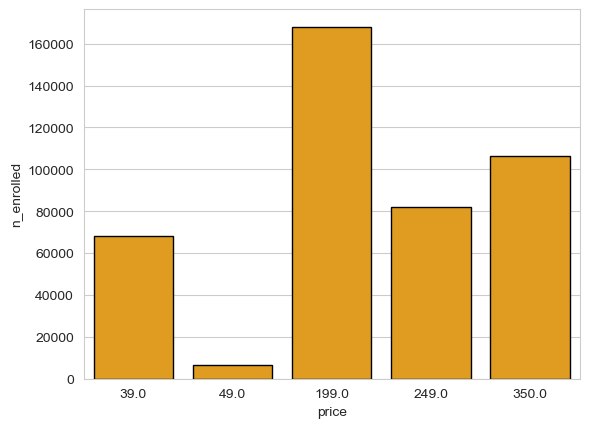

In [47]:
sns.barplot(x = 'price', y = 'n_enrolled', data = data_analysis_python, color = 'orange', edgecolor='black', ci=False)

In [48]:
data_analysis_prog = pd.read_sql(''' SELECT title, price, course_effort, n_enrolled, institution
                                       FROM edx_course_descriptions
                                       WHERE title LIKE '%Programming'
                                       ORDER BY price DESC  ''', edx_conn)
data_analysis_prog

,title,price,course_effort,n_enrolled,institution
0,Basics of Computing and Programming,200.0,6–8 hours per week,37045,New York University
1,Basics of Computing and Programming,200.0,6–8 hours per week,37045,New York University
2,Basics of Computing and Programming,200.0,6–8 hours per week,37045,New York University
3,Object-Oriented Programming,149.0,6–8 hours per week,93633,IITBombay
4,Object-Oriented Programming,149.0,6–8 hours per week,93633,IITBombay
5,Object-Oriented Programming,149.0,6–8 hours per week,93633,IITBombay
6,Computing in Python I: Fundamentals and Proced...,99.0,9–10 hours per week,141966,The Georgia Institute of Technology
7,AI Chatbots without Programming,99.0,2–4 hours per week,35440,IBM
8,Computing in Python I: Fundamentals and Proced...,99.0,9–10 hours per week,141966,The Georgia Institute of Technology
9,AI Chatbots without Programming,99.0,2–4 hours per week,35440,IBM


In [49]:
data_analysis_stat = pd.read_sql(''' SELECT title, price, course_effort, n_enrolled, institution
                                     FROM edx_course_descriptions
                                     WHERE title LIKE '%Statistics'
                                     ORDER BY price DESC ''', edx_conn)
data_analysis_stat

,title,price,course_effort,n_enrolled,institution
0,BioStatistics,79.0,5–10 hours per week,14937,Doane University
1,MathTrackX: Statistics,79.0,3–6 hours per week,0,University of Adelaide
2,BioStatistics,79.0,5–10 hours per week,14937,Doane University
3,MathTrackX: Statistics,79.0,3–6 hours per week,0,University of Adelaide
4,BioStatistics,79.0,5–10 hours per week,14937,Doane University
5,MathTrackX: Statistics,79.0,3–6 hours per week,0,University of Adelaide
6,Compilation Basics for Macroeconomic Statistics,25.0,3–6 hours per week,6570,The International Monetary Fund
7,Public Sector Debt Statistics,25.0,6–8 hours per week,0,The International Monetary Fund
8,Compilation Basics for Macroeconomic Statistics,25.0,3–6 hours per week,6570,The International Monetary Fund
9,Public Sector Debt Statistics,25.0,6–8 hours per week,0,The International Monetary Fund


In [50]:
data_analysis_prob = pd.read_sql(''' SELECT title, price, course_effort, n_enrolled, institution
                                     FROM edx_course_descriptions
                                     WHERE title LIKE '%Probability' AND title NOT LIKE '%MathTrackX: Probability'
                                     ORDER BY price DESC ''', edx_conn)
data_analysis_prob

,title,price,course_effort,n_enrolled,institution
0,Probability and Statistics I: A Gentle Introd...,199.0,6–10 hours per week,0,The Georgia Institute of Technology
1,Probability and Statistics I: A Gentle Introd...,199.0,6–10 hours per week,0,The Georgia Institute of Technology
2,Probability and Statistics I: A Gentle Introd...,199.0,6–10 hours per week,0,The Georgia Institute of Technology
3,Introduction to Probability,99.0,5–10 hours per week,97291,Harvard University
4,Introduction to Probability,99.0,5–10 hours per week,97291,Harvard University
5,Introduction to Probability,99.0,5–10 hours per week,97291,Harvard University
6,Introduction to Probability,99.0,5–10 hours per week,97291,Harvard University
7,Introduction to Probability,99.0,5–10 hours per week,97291,Harvard University
8,Introduction to Probability,99.0,5–10 hours per week,97291,Harvard University
9,Data Science: Probability,49.0,1–2 hours per week,135859,Harvard University


In [51]:
comp_sci_query = pd.read_sql(''' SELECT title, price, course_effort, n_enrolled, institution
                                 FROM edx_course_descriptions WHERE subject == 'Computer Science'
                                 ORDER BY price DESC LIMIT 15 ''', edx_conn)
comp_sci_query

,title,price,course_effort,n_enrolled,institution
0,Information Technology Foundations,399.6,9–10 hours per week,6388,Western Governors University
1,Information Technology Foundations,399.6,9–10 hours per week,6388,Western Governors University
2,Information Technology Foundations,399.6,9–10 hours per week,6388,Western Governors University
3,Driving Digital Innovation through Experimenta...,399.0,3–5 hours per week,16904,Boston University
4,Driving Digital Innovation through Experimenta...,399.0,3–5 hours per week,16904,Boston University
5,Driving Digital Innovation through Experimenta...,399.0,3–5 hours per week,16904,Boston University
6,Machine Learning with Python: from Linear Mode...,300.0,10–14 hours per week,85561,Massachusetts Institute of Technology
7,Machine Learning with Python: from Linear Mode...,300.0,10–14 hours per week,85561,Massachusetts Institute of Technology
8,Machine Learning with Python: from Linear Mode...,300.0,10–14 hours per week,85561,Massachusetts Institute of Technology
9,Network and Security Foundations,299.7,9–10 hours per week,7301,Western Governors University


<AxesSubplot:xlabel='price', ylabel='title'>

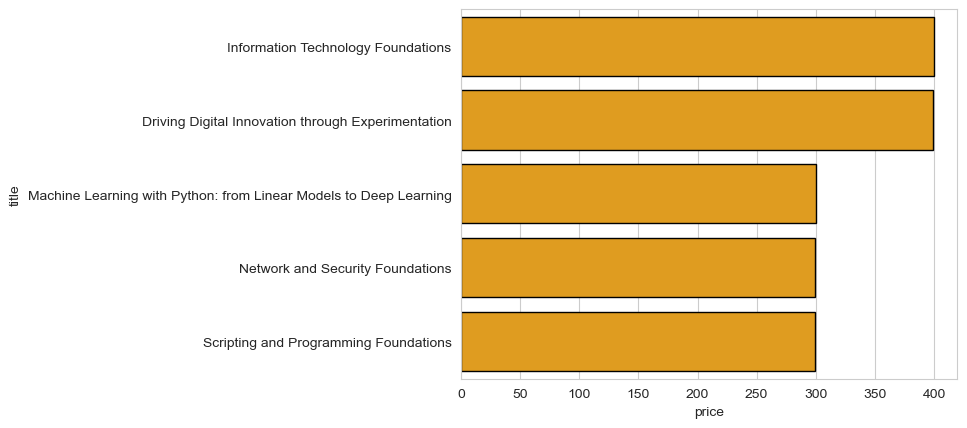

In [52]:
sns.barplot(x = 'price', y = 'title', data = comp_sci_query, color = 'orange', edgecolor='black', ci=False)

<AxesSubplot:xlabel='n_enrolled', ylabel='title'>

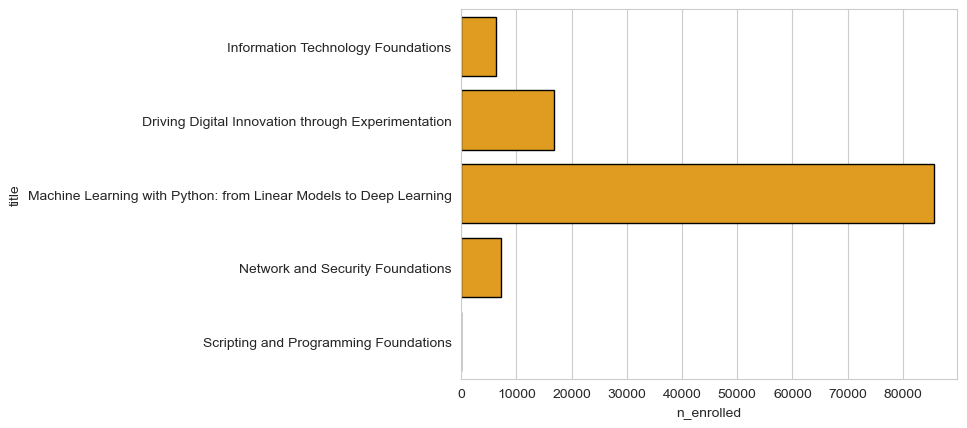

In [53]:
sns.barplot(x = 'n_enrolled', y = 'title', data = comp_sci_query, color = 'orange', edgecolor='black', ci=False)

<AxesSubplot:xlabel='price', ylabel='n_enrolled'>

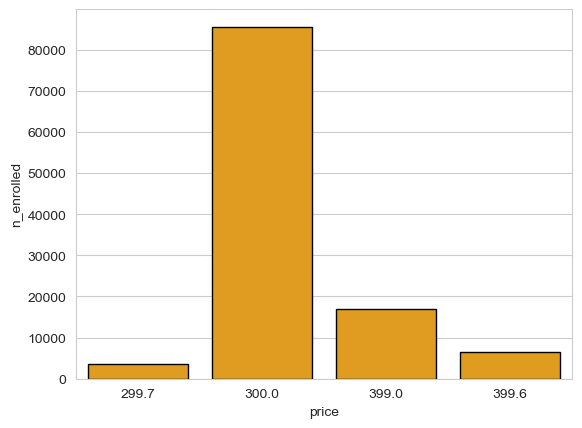

In [54]:
sns.barplot(x = 'price', y = 'n_enrolled', data = comp_sci_query, color = 'orange', edgecolor='black', ci=False)

In [55]:
data_analysis_tot = pd.read_sql(''' SELECT SUM(n_enrolled) AS total_program_enrollment, COUNT(title) AS num_courses, AVG(price) AS avg_course_purchase, MIN(price) AS min_course_purchase, MAX(price) AS max_course_purchase
                                    FROM edx_course_descriptions 
                                    WHERE subject == 'Data Analysis & Statistics'
                                    ORDER BY price DESC ''', edx_conn)
data_analysis_tot

,total_program_enrollment,num_courses,avg_course_purchase,min_course_purchase,max_course_purchase
0,12793236,216,92.63875,25.0,350.0


In [56]:
comp_sci_tot = pd.read_sql(''' SELECT SUM(n_enrolled) AS total_program_enrollment, COUNT(title) AS num_courses, AVG(price) AS avg_course_purchase, MIN(price) AS min_course_purchase, MAX(price) AS max_course_purchase
                               FROM edx_course_descriptions
                               WHERE subject == 'Computer Science'
                               ORDER BY price DESC ''', edx_conn)
comp_sci_tot

,total_program_enrollment,num_courses,avg_course_purchase,min_course_purchase,max_course_purchase
0,37343211,498,125.012048,49.0,399.6


In [57]:
edx_tot = pd.read_sql(''' SELECT SUM(n_enrolled) AS total_edx_enrollment, COUNT(title) AS total_courses, AVG(price) AS total_avg
                          FROM edx_course_descriptions
                          ORDER BY price DESC ''', edx_conn)
edx_tot

,total_edx_enrollment,total_courses,total_avg
0,136612800,2925,100.465497


In [58]:
business_tot = pd.read_sql(''' SELECT SUM(n_enrolled) AS total_business_enrollment, COUNT(title) AS total_courses, AVG(price) AS avg_course_purchase, MIN(price) AS min_course_purchase, MAX(price) AS max_course_purchase 
                               FROM edx_course_descriptions
                               WHERE subject == 'Business & Management'
                               ORDER BY price DESC ''', edx_conn)
business_tot

,total_business_enrollment,total_courses,avg_course_purchase,min_course_purchase,max_course_purchase
0,21229689,492,132.542683,5.0,399.0


In [59]:
engineering_tot = pd.read_sql(''' SELECT SUM(n_enrolled) AS total_engineering_enrollment, COUNT(title) AS total_courses, AVG(price) AS avg_course_purchase, MIN(price) AS min_course_purchase, MAX(price) AS max_course_purchase
                               FROM edx_course_descriptions
                               WHERE subject == 'Engineering'
                               ORDER BY price DESC ''', edx_conn)
engineering_tot

,total_engineering_enrollment,total_courses,avg_course_purchase,min_course_purchase,max_course_purchase
0,4190517,174,116.982759,25.0,299.0


In [60]:
ed_tot = pd.read_sql(''' SELECT SUM(n_enrolled) AS total_education_enrollment, COUNT(title) AS total_courses, AVG(price) AS avg_course_purchase, MIN(price) AS min_course_purchase, MAX(price) AS max_course_purchase
                               FROM edx_course_descriptions
                               WHERE subject == 'Education & Teacher Training'
                               ORDER BY price DESC ''', edx_conn)
ed_tot

,total_education_enrollment,total_courses,avg_course_purchase,min_course_purchase,max_course_purchase
0,2119596,87,83.068966,25.0,299.0


In [61]:
law_tot = pd.read_sql(''' SELECT SUM(n_enrolled) AS total_law_enrollment, COUNT(title) AS total_courses, AVG(price) AS avg_course_purchase, MIN(price) AS min_course_purchase, MAX(price) AS max_course_purchase
                               FROM edx_course_descriptions
                               WHERE subject == 'Law'
                               ORDER BY price DESC ''', edx_conn)
law_tot

,total_law_enrollment,total_courses,avg_course_purchase,min_course_purchase,max_course_purchase
0,874308,30,112.0,25.0,199.0


In [62]:
econ_tot = pd.read_sql(''' SELECT SUM(n_enrolled) AS total_economics_enrollment, COUNT(title) AS total_courses, AVG(price) AS avg_course_purchase, MIN(price) AS min_course_purchase, MAX(price) AS max_course_purchase
                               FROM edx_course_descriptions
                               WHERE subject == 'Economics & Finance'
                               ORDER BY price DESC ''', edx_conn)
econ_tot

,total_economics_enrollment,total_courses,avg_course_purchase,min_course_purchase,max_course_purchase
0,2507721,138,75.649565,5.0,450.0


In [71]:
by_subject = pd.read_sql(''' SELECT subject, COUNT(subject) AS subject_count,
                             100 * COUNT(subject) / (SELECT COUNT(*) FROM edx_course_descriptions) AS subject_pct
                             FROM edx_course_descriptions
                             GROUP BY subject
                             ORDER BY subject_pct DESC LIMIT 10''', edx_conn)
by_subject

,subject,subject_count,subject_pct
0,Computer Science,498,17
1,Business & Management,492,16
2,Data Analysis & Statistics,216,7
3,Humanities,192,6
4,Social Sciences,153,5
5,Engineering,174,5
6,Economics & Finance,138,4
7,Communication,117,4
8,Medicine,93,3
9,Math,93,3


In [73]:
by_subject_csv = by_subject.to_csv('by_subject_csv.csv')

<AxesSubplot:xlabel='subject_pct', ylabel='subject'>

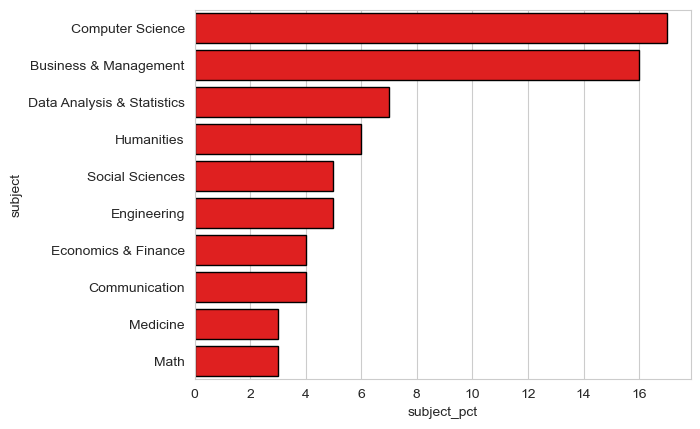

In [74]:
sns.barplot(x = 'subject_pct', y = 'subject', data = by_subject, color = 'red', edgecolor='black', ci=False)

In [75]:
edx_by_price = pd.read_sql(''' SELECT price, COUNT(price) AS price_count,
                           100 * COUNT(price) / (SELECT COUNT(*) FROM edx_course_descriptions) AS price_pct
                           FROM edx_course_descriptions
                           GROUP BY price
                           ORDER BY price_pct DESC LIMIT 10 ''', edx_conn)
edx_by_price

,price,price_count,price_pct
0,49.0,810,27
1,99.0,411,14
2,50.0,288,9
3,199.0,255,8
4,149.0,234,8
5,25.0,147,5
6,150.0,90,3
7,139.0,99,3
8,249.0,78,2
9,79.0,63,2


In [76]:
edx_price_pct_csv = edx_by_price.to_csv('edx_price_pct.csv')

<AxesSubplot:xlabel='price', ylabel='price_pct'>

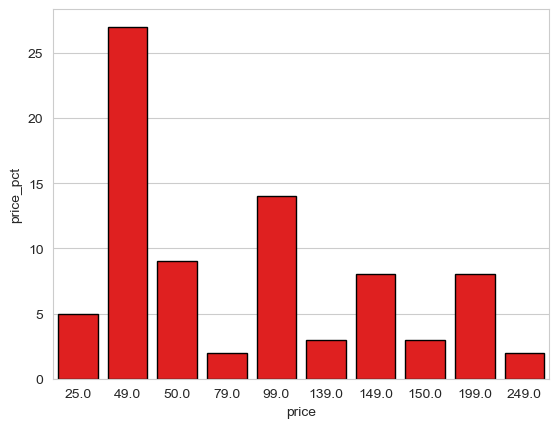

In [78]:
sns.barplot(x = 'price', y = 'price_pct', data = edx_by_price, color = 'red', edgecolor='black', ci=False)

In [79]:
by_course_effort = pd.read_sql(''' SELECT course_effort, COUNT(course_effort) AS num_hours, 
                                   100 * COUNT(course_effort) / (SELECT COUNT(*) FROM edx_course_descriptions) AS hours_pct
                                   FROM edx_course_descriptions 
                                   GROUP BY course_effort
                                   ORDER BY hours_pct DESC LIMIT 10 ''', edx_conn)
by_course_effort

,course_effort,num_hours,hours_pct
0,2–4 hours per week,324,11
1,3–5 hours per week,309,10
2,2–3 hours per week,312,10
3,3–4 hours per week,273,9
4,4–6 hours per week,237,8
5,8–10 hours per week,171,5
6,6–8 hours per week,153,5
7,4–5 hours per week,165,5
8,1–2 hours per week,165,5
9,5–7 hours per week,84,2


In [1]:
sns.barplot(x = 'hours_pct', y = 'course_effort', data = by_course_effort, color = 'blue', edgecolor='black', ci=False)

NameError: name 'sns' is not defined

In [81]:
by_institution = pd.read_sql(''' SELECT institution, COUNT(institution) AS institution_count,
                                 100 * COUNT(institution) / (SELECT COUNT(*) FROM edx_course_descriptions) AS institution_pct
                                 FROM edx_course_descriptions
                                 GROUP BY institution
                                 ORDER BY institution_pct DESC LIMIT 10''', edx_conn)
by_institution

,institution,institution_count,institution_pct
0,Harvard University,312,10
1,Universitat Politècnica de Valencia,141,4
2,Massachusetts Institute of Technology,123,4
3,IBM,90,3
4,Delft University of Technology,90,3
5,"University of California, Berkeley",60,2
6,The University of Queensland,78,2
7,The University of Michigan,66,2
8,Tecnológico de Monterrey,63,2
9,Stanford University,60,2


<AxesSubplot:xlabel='institution_pct', ylabel='institution'>

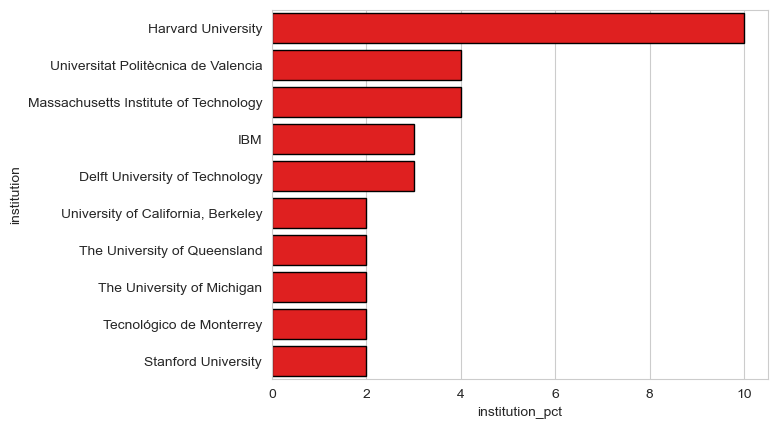

In [82]:
sns.barplot(x = 'institution_pct', y = 'institution', data = by_institution, color = 'red', edgecolor='black', ci=False)

In [83]:
by_institution_dsc = pd.read_sql(''' SELECT institution, COUNT(institution) AS institution_count,
                                 100 * COUNT(institution) / (SELECT COUNT(*) FROM edx_course_descriptions) AS institution_pct
                                 FROM edx_course_descriptions
                                 WHERe subject == 'Data Analysis & Statistics'
                                 GROUP BY institution
                                 ORDER BY institution_count DESC LIMIT 10''', edx_conn)
by_institution_dsc 

,institution,institution_count,institution_pct
0,IBM,60,2
1,Harvard University,54,1
2,Universidad Galileo,12,0
3,Tecnológico de Monterrey,12,0
4,Rolls-Royce,12,0
5,"The University of California, San Diego",9,0
6,Universitat Politècnica de Valencia,6,0
7,Massachusetts Institute of Technology,6,0
8,Inter-American Development Bank,6,0
9,École polytechnique fédérale de Lausanne,3,0


<AxesSubplot:xlabel='institution_count', ylabel='institution'>

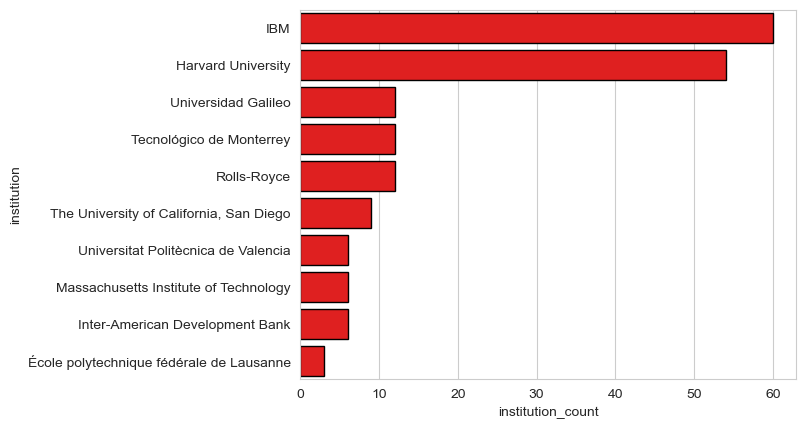

In [84]:
sns.barplot(x = 'institution_count', y = 'institution', data = by_institution_dsc, color = 'red', edgecolor='black', ci=False)

In [85]:
by_institution_comp_sci = pd.read_sql(''' SELECT institution, COUNT(institution) AS institution_count,
                                 100 * COUNT(institution) / (SELECT COUNT(*) FROM edx_course_descriptions) AS institution_pct
                                 FROM edx_course_descriptions
                                 WHERe subject == 'Computer Science'
                                 GROUP BY institution
                                 ORDER BY institution_count DESC LIMIT 10''', edx_conn)
by_institution_comp_sci 

,institution,institution_count,institution_pct
0,Universitat Politècnica de Valencia,39,1
1,IBM,30,1
2,"University of California, Berkeley",24,0
3,The Linux Foundation,24,0
4,Stanford University,24,0
5,Harvard University,24,0
6,Columbia University,21,0
7,Amazon Web Services,21,0
8,Dartmouth_IMTx-Dartmouth College-IMT,18,0
9,Curtin University,18,0


<AxesSubplot:xlabel='institution_count', ylabel='institution'>

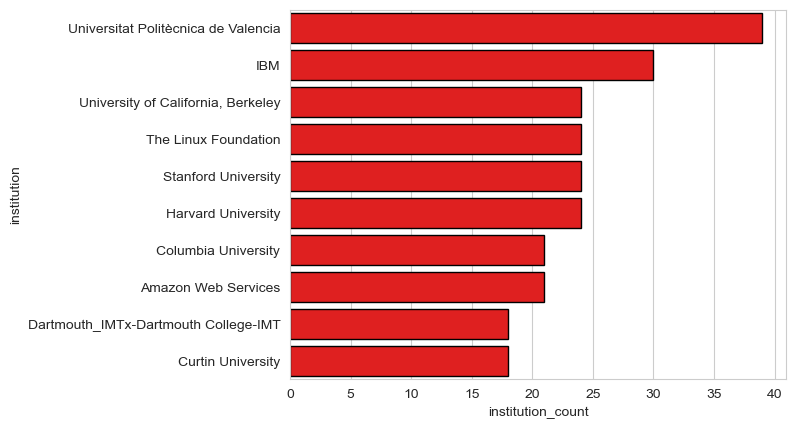

In [86]:
sns.barplot(x = 'institution_count', y = 'institution', data = by_institution_comp_sci, color = 'red', edgecolor='black', ci=False)

In [87]:
subject_hundred = pd.read_sql(''' SELECT subject, AVG(price) as avg_price_subject
                                  FROM edx_course_descriptions
                                  WHERE price > 100.0 
                                  GROUP BY subject
                                  ORDER BY avg_price_subject DESC LIMIT 10''', edx_conn)
subject_hundred = subject_hundred.round(2)
subject_hundred

,subject,avg_price_subject
0,Education & Teacher Training,227.00
1,Data Analysis & Statistics,222.38
2,Economics & Finance,213.56
3,Chemistry,199.00
4,Engineering,192.96
5,Computer Science,189.61
6,Environmental Studies,189.00
7,Design,189.00
8,Art & Culture,185.00
9,Business & Management,183.19


<AxesSubplot:xlabel='avg_price_subject', ylabel='subject'>

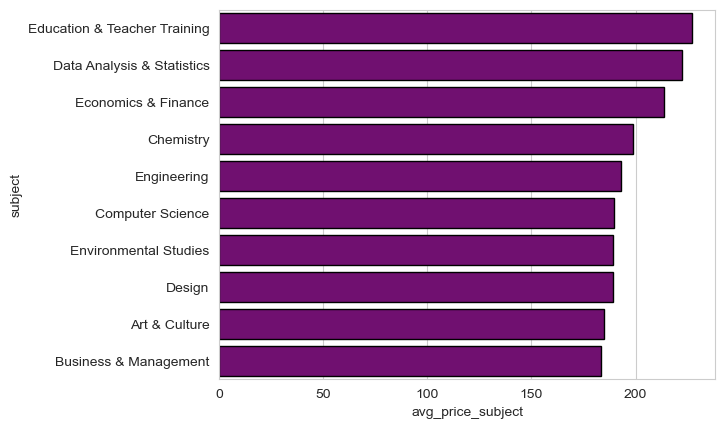

In [91]:
sns.barplot(x = 'avg_price_subject', y = 'subject', data = subject_hundred, color = 'grey', edgecolor='black', ci=False)

In [92]:
by_enroll = pd.read_sql(''' SELECT subject, SUM(n_enrolled) AS total_enrollment
                          FROM edx_course_descriptions 
                          GROUP BY subject
                          ORDER BY total_enrollment DESC LIMIT 10 ''', edx_conn)
by_enroll

,subject,total_enrollment
0,Computer Science,37343211
1,Business & Management,21229689
2,Communication,13923981
3,Data Analysis & Statistics,12793236
4,Humanities,10512420
5,Social Sciences,5533137
6,Biology & Life Sciences,5291496
7,Engineering,4190517
8,Language,3189771
9,Medicine,2969295


In [93]:
by_enroll_csv = by_enroll.to_csv('by_enroll.csv')

<AxesSubplot:xlabel='total_enrollment', ylabel='subject'>

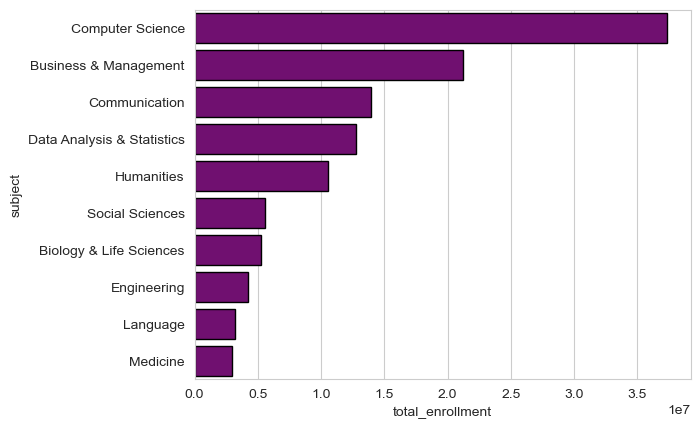

In [94]:
sns.barplot(x = 'total_enrollment', y = 'subject', data = by_enroll, color = 'purple', edgecolor='black', ci=False)

In [95]:
by_avg_enroll = pd.read_sql(''' SELECT subject, AVG(n_enrolled) AS avg_enrollment
                          FROM edx_course_descriptions 
                          GROUP BY subject
                          ORDER BY avg_enrollment DESC LIMIT 10 ''', edx_conn)
by_avg_enroll

,subject,avg_enrollment
0,Communication,119008.384615
1,Architecture,91322.200000
2,Computer Science,74986.367470
3,Data Analysis & Statistics,59227.944444
4,Humanities,54752.187500
5,Biology & Life Sciences,50395.200000
6,Literature,47898.000000
7,Business & Management,43149.774390
8,Chemistry,39507.000000
9,Social Sciences,36164.294118


<AxesSubplot:xlabel='avg_enrollment', ylabel='subject'>

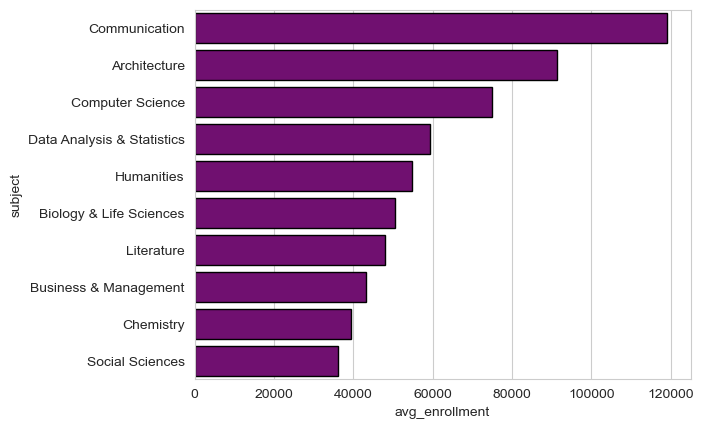

In [96]:
sns.barplot(x = 'avg_enrollment', y = 'subject', data = by_avg_enroll, color = 'purple', edgecolor='black', ci=False)